# Линейная (и не очень) классификация

Эта домашняя работа состоит из двух частей:

1. В первой части задания вам предстоит узнать, как с помощью [kernel trick](https://ru.wikipedia.org/wiki/%D0%AF%D0%B4%D0%B5%D1%80%D0%BD%D1%8B%D0%B9_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4) и создания новых признаков превратить ваш линейный классификатор в нелинейный.

2. Во второй части вы попрактикуетесь в отборе гиперпараметров, а также обучите и выберете лучшую модель из всех уже изученных на задаче многоклассовой классификации автомобилей.

##  Часть 1: нелинейные линейные модели

Линейные модели являются одними из простейших, хорошо интерпретируемых и не склонных к переобучению среди всех алгоритмов машинного обучения. Однако их мощности и выразительной способности может не хватать для решения достаточно сложных задач. Ниже вы проиллюстрируете эту проблему на примере задачи бинарной классификации с линейно неразделимыми классами и попробуете решить её доступными методами.

In [2]:
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

Возьмём для демонстрации игрушечный датасет [make_moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html):

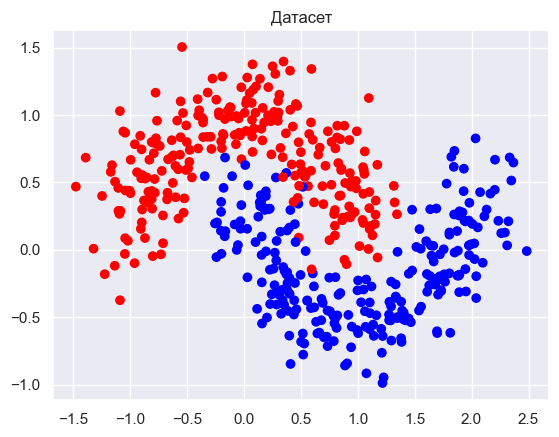

In [3]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)

class_to_color = {0: 'red', 1: 'blue'}
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=[class_to_color[label] for label in moons_labels])
plt.title('Датасет')
plt.show()

### 1.1 Линейные модели из коробки
Давайте попробуем начать с использования логистической регрессии и метода опорных векторов.

Обучите оба классификатора и нарисуйте решающую поверхность и классифицируемые регионы. **Не забудьте поделить данные на обучающие и тестовые!** Также выберите какую нибудь [метрику](https://scikit-learn.org/stable/api/sklearn.metrics.html#classification-metrics)  классификации и оцените с помощью неё качество на обучающих и тестовых данных. Опишите результаты в одном-двух предложениях.

Подсказка: чтобы нарисовать классифицируемые области вы можете вдохновиться [примерами](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) из sklearn-а или воспользоваться готовой функцией `plot_decision_regions` из пакета [mlxtend](https://github.com/rasbt/mlxtend) (см. примеры по ссылке).

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression()
svm = SVC(kernel='linear')

X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(moons_points, moons_labels, test_size=0.2)

logreg = LogisticRegression(penalty = 'l2')
logreg.fit(X_train_vis, y_train_vis)

svm.fit(X_train_vis, y_train_vis)

SVC(kernel='linear')

In [5]:
from sklearn import metrics

logreg_preds = logreg.predict(X_test_vis)

print('LogReg F1 =', metrics.f1_score(y_test_vis, logreg_preds))

svm_preds = svm.predict(X_test_vis)
print('SVM F1 =', metrics.f1_score(y_test_vis, svm_preds))

LogReg F1 = 0.8842105263157894
SVM F1 = 0.8842105263157894


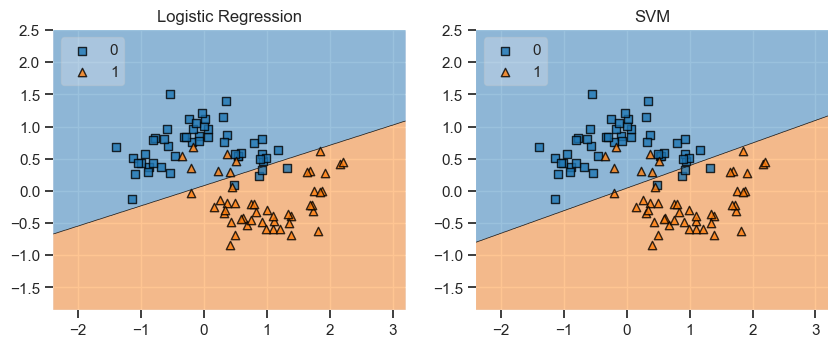

In [6]:
import matplotlib.gridspec as gridspec
import itertools

# Plotting Decision Regions
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

for clf, lab, grd in zip([logreg, svm],
                         ['Logistic Regression', 'SVM'],
                         itertools.product([0, 1], repeat=2)):
    #clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test_vis, y=y_test_vis, clf=clf, legend=2)
    plt.title(lab)
plt.show()

**Опишите результаты в одном-двух предложениях** 
Обе модели дали примерно одинаковый результат, т.к. обе делали предсказание на основание линейной функции.

### 1.2 Kernel trick

Теперь попробуйте поиграться с кернелами в методе опорных векторов. Используйте различные кернелы (`poly`, `rbf`, `sigmoid`) для получения наилучшего результата.

Для каждого кернела постройте свой график с классифицируемыми регионами и посчитайте ранее выбранную метрику.

Опишите в нескольких предложениях

* Как использование кернелов повлияло на качество классификации?
* Как изменилась решающая поверхность для каждого кернела?

In [7]:
svm_poly = SVC(kernel='poly')
svm_rbf = SVC()
svm_sig = SVC(kernel='sigmoid')

svm_poly.fit(X_train_vis, y_train_vis)
svm_rbf.fit(X_train_vis, y_train_vis)
svm_sig.fit(X_train_vis, y_train_vis)

print('LogReg F1 =', metrics.f1_score(y_test_vis, logreg_preds))
print('SVM F1 =', metrics.f1_score(y_test_vis, svm_preds))

svm_poly_preds = svm_poly.predict(X_test_vis)
print('SVM_Poly F1 =', metrics.f1_score(y_test_vis, svm_poly_preds))

svm_rbf_preds = svm_rbf.predict(X_test_vis)
print('SVM_RBF F1 =', metrics.f1_score(y_test_vis, svm_rbf_preds))

svm_sig_preds = svm_sig.predict(X_test_vis)
print('SVM_Sig F1 =', metrics.f1_score(y_test_vis, svm_sig_preds))

LogReg F1 = 0.8842105263157894
SVM F1 = 0.8842105263157894
SVM_Poly F1 = 0.9183673469387755
SVM_RBF F1 = 0.9473684210526315
SVM_Sig F1 = 0.7058823529411765


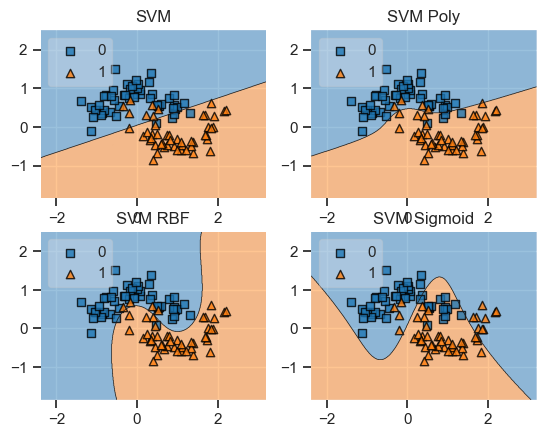

In [8]:
for clf, lab, grd in zip([svm, svm_poly, svm_rbf, svm_sig],
                         ['SVM', 'SVM Poly', 'SVM RBF', 'SVM Sigmoid'],
                         itertools.product([0, 1], repeat=2)):
    #clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test_vis, y=y_test_vis, clf=clf, legend=2)
    plt.title(lab)
plt.show()

### 1.3 Более простое решение
А как можно было бы решить поставленную задачу и построить нелинейную разделяющую поверхность с помощью логистической регрессии? В этом может помочь создание новых признаков. В данном случае вам предлагается добавить признаки, имеющие вид произведений исходных признаков.

За этим стоит простая идея. Решающая поверхность в случае логистической регрессии с двумя признаками задаётся уравнением прямой или, что то же самое, уравнением линии уровня решающей функции со значением 0:
$$ \omega_0 + x_1 \cdot \omega_1 + x_2 \cdot \omega_2 = 0.$$
Если мы добавим объектам признаки $x_1 \cdot x_2$, $x_1^2$, $x_2^2$, то уравнение решающей поверхности примет вид

$$ \omega_0 + x_1 \cdot \omega_1 + x_2 \cdot \omega_2 + x_1 \cdot x_2 \cdot \omega_3 + x_1^2 \cdot \omega_4 + x_2^2 \cdot \omega_5 = 0.$$
Это уравнение задаёт гиперплоскость (линейную разделяющую поверхность) в новом (2 + 3)-мерном пространстве признаков, однако в исходном двумерном пространстве оно задаёт некоторую нелинейную кривую.

Необязательно добавлять в качестве новых признаков именно полиномы от старых признаков. Можно подойти к вопросу творчески и добавлять произвольные нелинейные комбинации признаков: $\log x_1$, $\exp(x_2)$, $\log\left(\dfrac{x_2^2 \cdot x_1 + \pi}{\exp(x_1 \cdot x_2^{0.3}) + 1}\right)$ и т.д. Чем больше сложных нелинейных признаков вы добавите, тем большую мощность обретёт ваша исходно слабая линейная модель. 

В коде ниже добавьте объектам датасета полиномиальные признаки с помощью класса [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) и аналогично предыдущему пункту обучите логистическую регрессию, изобразите классифицируемые области и посчитайте выбранную метрику.

В данном случае с практической точки зрения удобно считать создание новых признаков не этапом работы с данными, а одним из шагов алгоритма. Попробуйте объединить создание полиномиальных признаков и работу классификатора в один алгоритм с помощью [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html). Эта функция может вам понадобиться и во второй части работы.

LogReg poly F1 = 0.9791666666666666


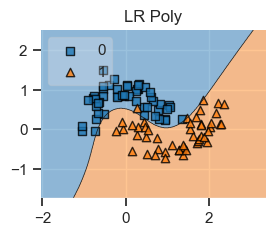

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.2, random_state=123)
pipe = make_pipeline(PolynomialFeatures(3), LogisticRegression(penalty='l2'))


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('LogReg poly F1 =', metrics.f1_score(y_test, y_pred))
for clf, lab, grd in zip([pipe],
                         ['LR Poly'],
                         itertools.product([0, 1], repeat=2)):
    #clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)
plt.show()

### 1.4 Более сложная задача

Сделаем задачу чуть сложнее, объединив несколько игрушечных датасетов в один:

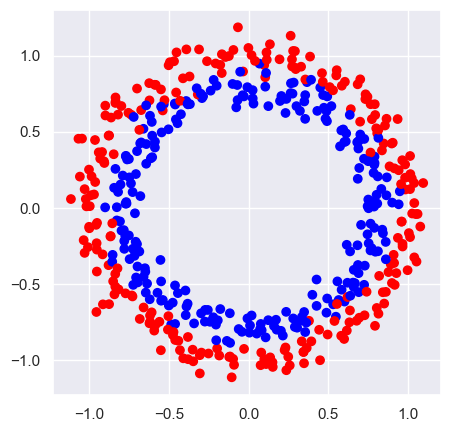

In [10]:
class_to_color = {0: 'red', 1: 'blue', 2: 'green', 3: 'orange'}
circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=[class_to_color[label] for label in circles_labels])
plt.show()

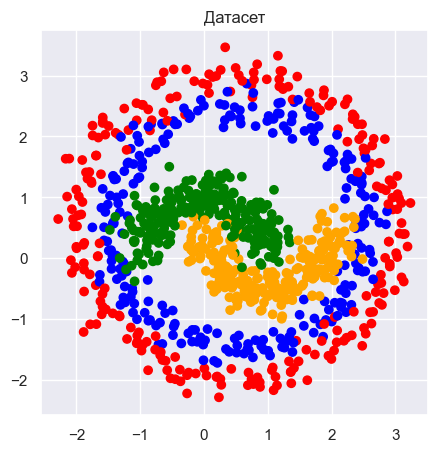

In [11]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=[class_to_color[label] for label in labels])
plt.title('Датасет')
plt.show()

Попробуйте решить эту задачу с помощью подходов, изученных ранее. 

Подберите наилучшие параметры для степени полиномиальных признаков для логистической регрессии и наилучшие параметры для ядер метода опорных векторов.

Также вы можете опробовать на этой задаче другие изученные модели - [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) и [наивный байесовский классификатор](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html).

Опишите полученные результаты в нескольких предложениях.

LogReg poly  F1 = 0.9350697432296647
SVC_RBF  F1 = 0.914503182172446
KNN  F1 = 0.940353153089108


c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\mlxtend\plotting\decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


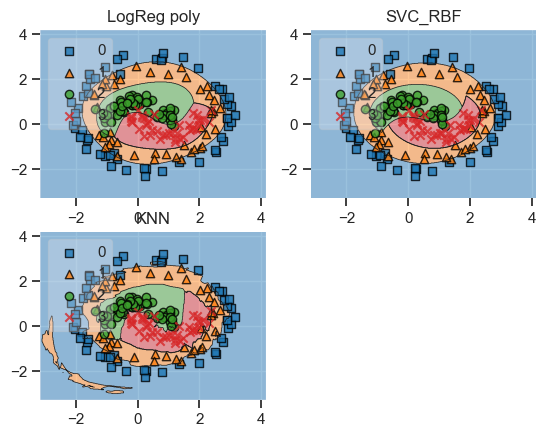

In [12]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.2, random_state=123)
clfs = np.array([
    ["LogReg poly", make_pipeline(PolynomialFeatures(4), LogisticRegression(penalty='l2'))],
    ["SVC_RBF", make_pipeline(SVC())],
    ["KNN", make_pipeline(PolynomialFeatures(4), KNeighborsClassifier(n_neighbors = 3))]
], dtype="object")

for name, clf in zip(clfs[:, 0], clfs[:, 1]):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(name, ' F1 =', metrics.f1_score(y_test, y_pred, average='weighted')) 

for clf, lab, grd in zip(clfs[:, 1],
                         clfs[:, 0],
                         itertools.product([0, 1], repeat=2)):
    #clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_test, y=y_test, clf=clf, legend=2)
    plt.title(lab)
plt.show()

## Часть 2: подбор гиперпараметров и тюнинг моделей


В этой части задания вы будете работать с датасетом описаний автомобилей.

In [13]:
# Скачивание данных
#!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1hDbmoa1g-EmtFMgvXWlutY53aC6v53y4' -O car_data.json

Код ниже делит данные на обучающие и тестовые, **не меняйте его!**

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


# Загрузка данных
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, 1:-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

# Разделение на обучающие и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(f'{len(np.unique(target))} класса: {np.unique(target)}')

(846, 18) (846,)
(549, 18) (549,) (297, 18) (297,)
4 класса: ['bus' 'opel' 'saab' 'van']


Для разведывательного анализа данных удобно использовать библиотеку [pandas](https://pandas.pydata.org/):

In [15]:
X_train_pd = pd.DataFrame(X_train)

# Покаывает первые 15 строчек датасета
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
1,104,57,103,222,72,12,221,30,25,177,223,718,218,72,11,12,186,195
2,91,42,66,169,66,7,145,44,19,140,169,325,159,67,4,0,201,207
3,109,52,95,189,58,4,227,29,25,158,262,776,217,82,0,19,187,186
4,95,47,73,195,70,7,167,38,20,152,184,430,185,69,9,19,200,206
5,81,44,72,139,60,6,153,44,19,146,180,347,178,81,1,15,182,186
6,93,34,66,140,56,7,130,51,18,120,151,251,114,62,5,29,201,207
7,89,43,77,147,54,8,144,46,19,146,163,308,174,64,13,5,194,201
8,117,52,110,228,65,12,212,31,24,163,228,668,220,66,21,25,194,205
9,109,49,109,193,59,10,207,32,24,156,225,635,213,70,13,31,191,202


In [16]:
# Метод `describe` показывает некоторые статистики признаков датасета
# Например он показывает средние значения (mean), стандартные отклонения (std), максимумы (max) и минимумы (min) признаков и другое
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,93.520947,44.675774,81.801457,168.204007,61.644809,8.457195,167.327869,41.273224,20.468124,147.438980,186.734062,431.540984,173.763206,72.158470,6.522769,12.646630,188.998179,195.854281
std,8.063277,6.154680,15.928751,33.047995,7.110666,3.945857,32.506680,7.777590,2.526030,14.631309,30.436279,171.479332,31.793047,7.335198,4.980796,8.833356,6.298389,7.449629
min,76.000000,33.000000,42.000000,104.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,93.000000,44.000000,79.000000,165.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,177.000000,363.000000,173.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,99.000000,49.000000,98.000000,195.000000,66.000000,10.000000,196.000000,46.000000,23.000000,159.000000,216.000000,576.000000,196.000000,75.000000,10.000000,19.000000,193.000000,201.000000
max,117.000000,59.000000,110.000000,306.000000,126.000000,52.000000,265.000000,59.000000,29.000000,186.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,40.000000,206.000000,211.000000


В качестве метрики выберем `Accuracy`

В качестве бейзлайна давайте возьмём классификатор, предсказывающий самый популярный класс из обучающего датасета

In [17]:
from collections import Counter
from sklearn.metrics import accuracy_score

class MostFrequentClassifier:
    def fit(self, X_train, y_train):
        self.most_frequent_label = Counter(y_train).most_common(1)[0][0]

    def predict(self, X):
        return np.full(X.shape[0], self.most_frequent_label)

baseline_classifier = MostFrequentClassifier()
baseline_classifier.fit(X_train, y_train)

print(f'Accuracy бейзлайна: {accuracy_score(baseline_classifier.predict(X_test), y_test)}')

Accuracy бейзлайна: 0.20202020202020202


Всегда важно иметь в арсенале простое, возможно некачественное, но интерпретируемое решение задачи - бейзлайн. Далее при обучении более сложных моделей можно будет отталкиваться от метрики, полученной бейзлайном. Если более сложная модель получила меньшее значение метрики, значит видимо что-то идёт не так и необходимо проанализировать где могла случиться проблема.

### Подбор гиперпараметров

Подбор гиперпараметров - довольно сложная задача, так как обычно гиперпараметры нельзя подобрать сильно более оптимальным образом, чем перебором. В sklearn для подбора гиперпараметров есть [набор](https://scikit-learn.org/stable/api/sklearn.model_selection.html#hyper-parameter-optimizers) простых стратегий, например таких как
* [Поиск по сетке](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#gridsearchcv)
* [Рандомизированный поиск](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV)

Для более "умного" подбора гиперпараметров существуют специально предназначенные для этого библиотеки, например [optuna](https://optuna.org/).

Давайте попробуем запустить поиск по сетке каких нибудь параметров логистической регрессии:

In [18]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Словарь "параметр" -> "сетка поиска"
params_to_search = {'C': [0.5, 1, 2], 'penalty': ['l1', 'l2'], 'max_iter': [250, 500]}

# Создаём объект класса `GridSearchCV` - поиска по сетке
# В конструктор класса подаётся классификатор, параметры которого мы будем перебирать и словарь параметров
cv = GridSearchCV(LogisticRegression(solver='saga'), params_to_search)

# Метод `fit` последовательно обучает переданную модель со всеми комбинациями параметров из `params_to_search`
# Оценка комбинации параметров происходит с помощью кросс-валидации по 5 фолдам (можно настраивать это значение)
cv.fit(X_train, y_train)

GridSearchCV(estimator=LogisticRegression(solver='saga'),
             param_grid={'C': [0.5, 1, 2], 'max_iter': [250, 500],
                         'penalty': ['l1', 'l2']})

In [19]:
# Лучшими значениями параметров считаются те, которые дают наибольший средний `score` модели на обучающей выборке
# Таким образом алгоритм, поданный на вход `GridSearchCV` должен иметь метод `score`, оценивающий его качество
# Для `LogisticRegression` `score`-ом является Accuracy
lr = LogisticRegression(solver='saga')
lr.fit(X_train, y_train)
lr.score(X_test, y_test), accuracy_score(lr.predict(X_test), y_test)

(0.6599326599326599, 0.6599326599326599)

In [20]:
# У `GridSearchCV` есть метод `predict`, считающий предсказания для модели с наилучшими значениями параметров
y_test_best_model = cv.predict(X_test)

print(accuracy_score(y_test_best_model, y_test))

# Наилучшие значения параметров можно достать так
print(cv.best_params_)

0.7205387205387206
{'C': 0.5, 'max_iter': 500, 'penalty': 'l2'}


In [21]:
# Различные результаты перебора гиперпараметров можно достать так
cv.cv_results_

{'mean_fit_time': array([0.04040599, 0.02740273, 0.08059192, 0.04993701, 0.04438572,
        0.02519855, 0.07988768, 0.05379906, 0.04139977, 0.02519693,
        0.08060279, 0.05006471]),
 'std_fit_time': array([0.0004859 , 0.00149908, 0.00319245, 0.00064623, 0.00634835,
        0.00074877, 0.00108251, 0.00194097, 0.00185297, 0.00040555,
        0.00150898, 0.00103857]),
 'mean_score_time': array([0.00039921, 0.        , 0.00020056, 0.00019617, 0.        ,
        0.00060077, 0.00079985, 0.        , 0.00019979, 0.00020409,
        0.00040112, 0.0006021 ]),
 'std_score_time': array([0.00048893, 0.        , 0.00040112, 0.00039234, 0.        ,
        0.00049054, 0.00039997, 0.        , 0.00039959, 0.00040817,
        0.00049128, 0.00049166]),
 'param_C': masked_array(data=[0.5, 0.5, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0,
                    2.0],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_

### Покажите класс!

Теперь, зная как подбирать гиперпараметры и обучать модели, попробуйте обучить модель, дающую $\mathbf{\geq 0.85}$ Accuracy на тестовых данных. Вы в праве выбирать любую изученную модель и любые её гиперпараметры. Также вы можете предобрабатывать данные любым образом (нормализовать, генерировать дополнительные признаки и т.д.). Единственное что запрещено - менять то, как данные разделены на трейн и тест и обучаться на тестовых данных.

**Дерзайте!**

In [22]:
import warnings
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.exceptions import ConvergenceWarning
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import QuantileTransformer  
from sklearn.preprocessing import Normalizer 
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# SVC try 0.845
# params_to_search = {'C': [1, 5, 10,11, 12], 'kernel':('poly', 'rbf', 'sigmoid'), 'max_iter': [200, 250, 500], "coef0": [0.5, 1, 2], }
# cv = GridSearchCV(SVC(), params_to_search)
# pipe = make_pipeline(StandardScaler(),QuantileTransformer(output_distribution='normal'), Normalizer(),cv)

# KNN try 0.58
# params_to_search = {'n_neighbors': [7,8,9], "weights" : ['uniform', 'distance'], 'p': [1,2] }
# cv = GridSearchCV(KNeighborsClassifier(), params_to_search)

# LR try 0.835
# params_to_search = {'C': [1, 5, 10, 20, 25], 'penalty': ['l2'], 'max_iter': [200, 250], 'solver' : ['newton-cg']}
# cv = GridSearchCV(LogisticRegression(class_weight='balanced'), params_to_search)
# pipe = make_pipeline(StandardScaler(),cv)

#CategoricalNB 0.45
# params_to_search = {'alpha': [0, 0.5, 1], }
# cv = GridSearchCV(MultinomialNB(fit_prior=False), params_to_search)

#SGD
params_to_search = {'loss': ['hinge', 'log_loss', 'modified_huber', 'squared_hinge',
        'perceptron', 'squared_error', 'huber', 'epsilon_insensitive',
        'squared_epsilon_insensitive'], 'penalty': ['l2', 'l1', 'elasticnet', None], 'alpha': [0.0001, 0.001, 0.01, 0.1, 1], 'l1_ratio': [0.25, 0.5, 0.75],
        'max_iter': [100, 200, 500], 'learning_rate':['constant','optimal','invscaling','adaptive'], 'eta0': [0, 0.5, 1], 'power_t': [-1, 0, 1], 'class_weight':['balanced', None]}
cv = GridSearchCV(SGDClassifier(), params_to_search)
#StandardScaler(),QuantileTransformer(output_distribution='normal'), Normalizer(),
pipe = make_pipeline(cv)

# Метод `fit` последовательно обучает переданную модель со всеми комбинациями параметров из `params_to_search`
# Оценка комбинации параметров происходит с помощью кросс-валидации по 5 фолдам (можно настраивать это значение)
pipe.fit(X_train, y_train)

y_test_best_model = pipe.predict(X_test)

print(accuracy_score(y_test_best_model, y_test))

# Наилучшие значения параметров можно достать так
print(cv.best_params_)

c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
145800 fits failed out of a total of 583200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
145800 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Wor

0.7003367003367004
{'alpha': 0.0001, 'class_weight': None, 'eta0': 0.5, 'l1_ratio': 0.25, 'learning_rate': 'adaptive', 'loss': 'squared_hinge', 'max_iter': 100, 'penalty': 'l2', 'power_t': 1}


c:\Users\Work\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.24220183 0.2093578  0.25127606]
  warnings.warn(
